In [1]:
import os
import sys
sys.path.append('../python')

import pandas as pd
import numpy as np
import yaml
import time
import json
import ast
import pickle
import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from matplotlib import pyplot as plt

import api
import data_tools
import text_tools

rng = np.random.default_rng(20241025)

CENSOR_DATE = pd.to_datetime('2022-08-01')

## Demonstration of embeddings

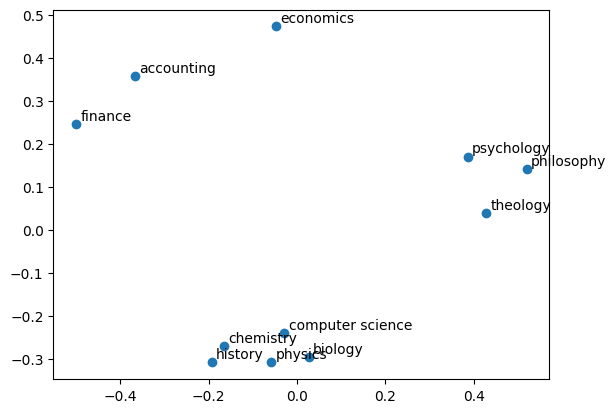

In [98]:
word_list = [
    'physics',
    'biology',
    'chemistry',
    'accounting',
    'finance',
    'economics',
    'history',
    'philosophy',
    'theology',
    'psychology',
    'computer science'
]
# Get embeddings
embeddings = api.get_embeddings_openai(word_list)
embeddings = np.array(embeddings)

# 2-dimensionalize the embeddings
pca = PCA(n_components=2)
pca.fit(embeddings)
embeddings_2d = pca.transform(embeddings)

# Plot the 2d embeddings
x = embeddings_2d[:,0]
y = embeddings_2d[:,1]
plt.scatter(x,y)
for i in range(len(word_list)):
    plt.text(x[i]+0.01, y[i]+0.01, word_list[i])
plt.show()
